In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [2]:
train_data.head()

,shot_id,action_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_zone_area,game_date,opponent
0,18924,Jump Shot,33.9913,204,53,-118.0658,4,4,0,Dec-11,59,21,0.0,Right Side(R),2012/2/17,PHX
1,27600,Jump Shot,33.9813,29,63,-118.2408,1,3,0,1998-99,52,6,1.0,Center(C),1999/4/20,GSW
2,6425,Jump Shot,33.9813,168,63,-118.1018,2,3,0,Oct-09,5,17,1.0,Right Side(R),2009/12/29,GSW
3,25941,Running Jump Shot,34.0003,57,44,-118.2128,8,3,0,1999-00,54,7,1.0,Center(C),2000/4/10,SEA
4,20265,Jump Shot,33.8453,100,199,-118.1698,4,4,0,Mar-02,29,22,NaN,Right Side Center(RC),2003/2/18,HOU


In [107]:
train_data.shape

(24557, 16)

In [3]:
#train_data[train_data['action_type']=='Cutting Finger Roll Layup Shot']

In [55]:
gp = train_data.groupby(['action_type'])
gp.size()

action_type
Alley Oop Dunk Shot                      90
Alley Oop Layup shot                     67
Cutting Finger Roll Layup Shot            1
Cutting Layup Shot                        6
Driving Bank shot                         3
Driving Dunk Shot                       241
Driving Finger Roll Layup Shot           63
Driving Finger Roll Shot                 69
Driving Floating Bank Jump Shot           1
Driving Floating Jump Shot                3
Driving Hook Shot                        12
Driving Jump shot                        22
Driving Layup Shot                     1579
Driving Reverse Layup Shot               75
Driving Slam Dunk Shot                   40
Dunk Shot                               211
Fadeaway Bank shot                       26
Fadeaway Jump Shot                      856
Finger Roll Layup Shot                   22
Finger Roll Shot                         21
Floating Jump shot                       92
Follow Up Dunk Shot                       9
Hook Bank Shot      

In [6]:
#train_data.drop(gp.filter(lambda x: len(x) < 1000).index,inplace=True)
#np.unique(train_data['action_type'])

In [7]:
#train_data.reset_index(drop=True,inplace=True)

In [8]:
#train_data.shape

In [108]:
np.unique(train_data.action_type)

array(['Alley Oop Dunk Shot', 'Alley Oop Layup shot',
       'Cutting Finger Roll Layup Shot', 'Cutting Layup Shot',
       'Driving Bank shot', 'Driving Dunk Shot',
       'Driving Finger Roll Layup Shot', 'Driving Finger Roll Shot',
       'Driving Floating Bank Jump Shot', 'Driving Floating Jump Shot',
       'Driving Hook Shot', 'Driving Jump shot', 'Driving Layup Shot',
       'Driving Reverse Layup Shot', 'Driving Slam Dunk Shot', 'Dunk Shot',
       'Fadeaway Bank shot', 'Fadeaway Jump Shot',
       'Finger Roll Layup Shot', 'Finger Roll Shot', 'Floating Jump shot',
       'Follow Up Dunk Shot', 'Hook Bank Shot', 'Hook Shot',
       'Jump Bank Shot', 'Jump Hook Shot', 'Jump Shot', 'Layup Shot',
       'Pullup Bank shot', 'Pullup Jump shot', 'Putback Dunk Shot',
       'Putback Layup Shot', 'Putback Slam Dunk Shot', 'Reverse Dunk Shot',
       'Reverse Layup Shot', 'Reverse Slam Dunk Shot', 'Running Bank shot',
       'Running Dunk Shot', 'Running Finger Roll Layup Shot',
       

In [10]:
train_data.columns

Index(['shot_id', 'action_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_zone_area', 'game_date', 'opponent'],
      dtype='object')

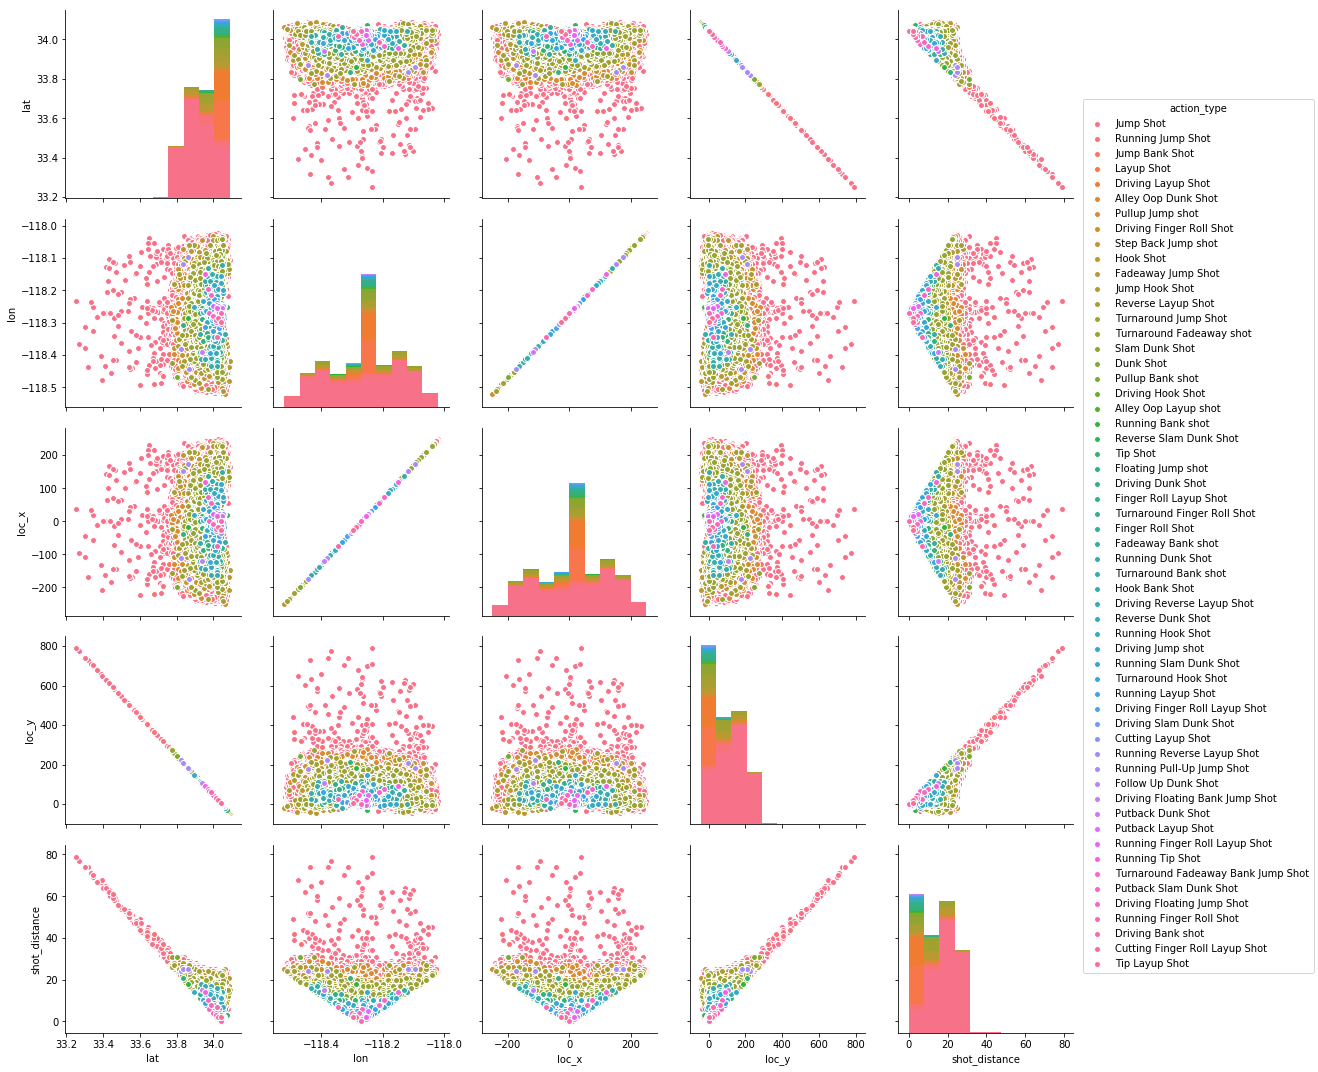

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(train_data, vars=['lat', 'lon', 'loc_x', 'loc_y', 'shot_distance'], hue='action_type', size=3)
plt.show()

In [109]:
train_data['season'].unique()

array(['Dec-11', '1998-99', 'Oct-09', '1999-00', 'Mar-02', 'Apr-03',
       '2015-16', 'Feb-01', '1996-97', 'Jul-06', 'May-04', 'Jun-05',
       'Aug-07', '2012-13', '2014-15', 'Nov-10', 'Sep-08', 'Jan-00',
       '1997-98', '2013-14'], dtype=object)

In [110]:
train_data['season'] = train_data['season'].apply(lambda x: int(x.split('-')[1]) )
train_data['season'].unique()

array([11, 99,  9,  0,  2,  3, 16,  1, 97,  6,  4,  5,  7, 13, 15, 10,  8,
       98, 14], dtype=int64)

In [111]:
test_data['season'] = test_data['season'].apply(lambda x: int(x.split('-')[1]) )
test_data['season'].unique()

array([99,  5,  1,  0,  9,  4, 98, 97, 16,  7, 13, 11,  2,  8,  6, 10,  3,
       15, 14], dtype=int64)

In [112]:
# Remaining time
train_data['remaining_time'] = 60 * train_data['minutes_remaining'] + train_data['seconds_remaining']
# Game date
train_data['game_date'] = pd.to_datetime(train_data['game_date'])
train_data['game_year'] = train_data['game_date'].dt.year
train_data['game_month'] = train_data['game_date'].dt.month

In [113]:
# Remaining time
test_data['remaining_time'] = 60 * test_data['minutes_remaining'] + test_data['seconds_remaining']
# Game date
test_data['game_date'] = pd.to_datetime(test_data['game_date'])
test_data['game_year'] = test_data['game_date'].dt.year
test_data['game_month'] = test_data['game_date'].dt.month

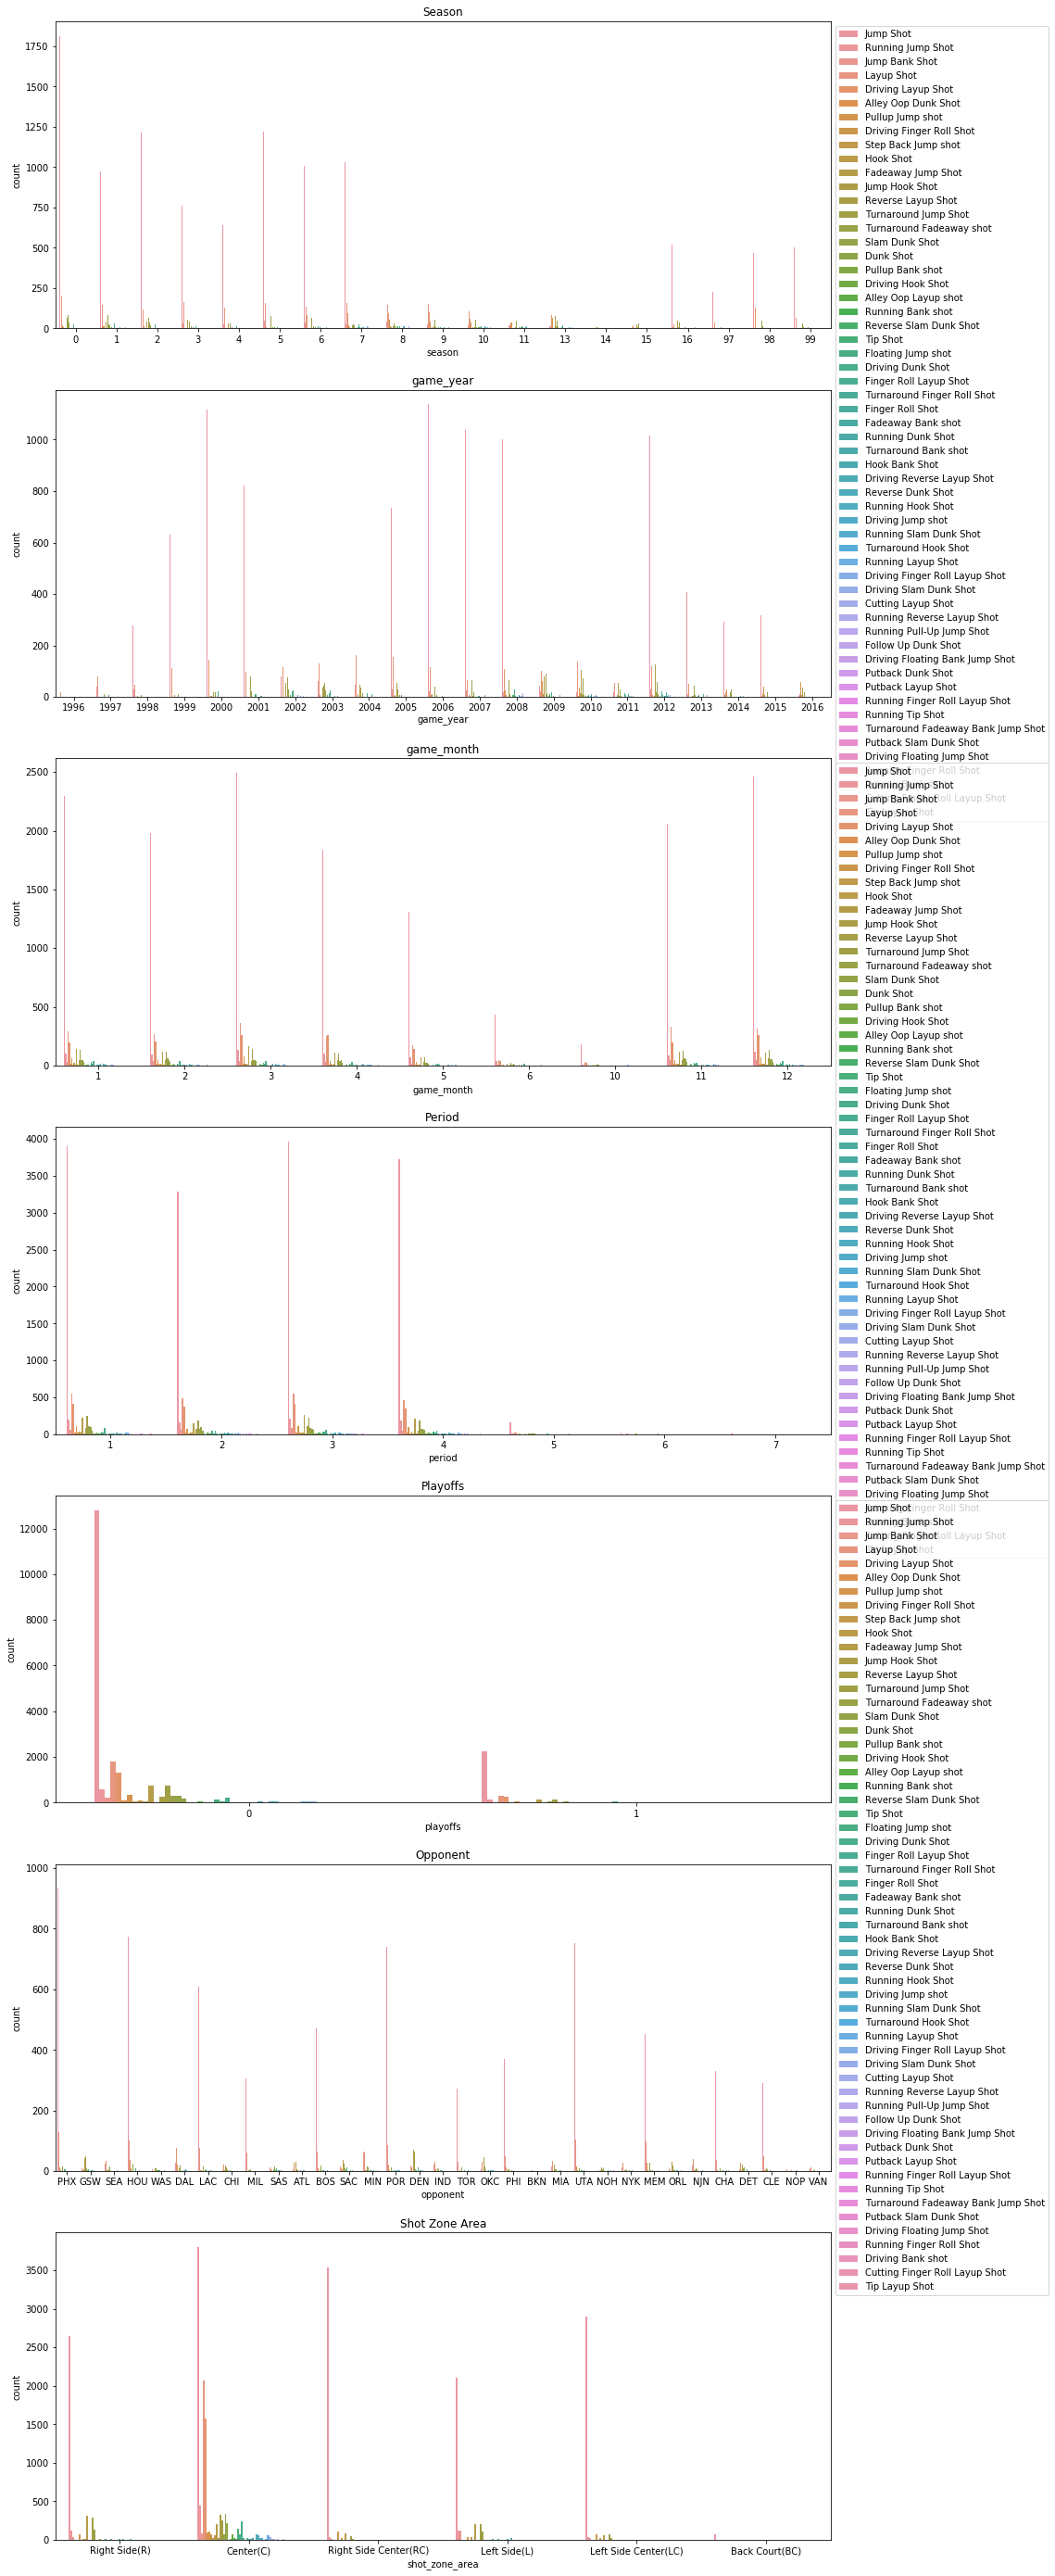

In [63]:
f, axarr = plt.subplots(7, figsize=(15, 50))

sns.countplot(x="season", hue="action_type", data=train_data, ax=axarr[0])
sns.countplot(x="game_year", hue="action_type", data=train_data, ax=axarr[1])
sns.countplot(x="game_month", hue="action_type", data=train_data, ax=axarr[2])
sns.countplot(x="period", hue="action_type", data=train_data, ax=axarr[3])
sns.countplot(x="playoffs", hue="action_type", data=train_data, ax=axarr[4])
sns.countplot(x="opponent", hue="action_type", data=train_data, ax=axarr[5])
sns.countplot(x="shot_zone_area", hue="action_type", data=train_data, ax=axarr[6])

axarr[0].set_title('Season')
axarr[0].legend(bbox_to_anchor=(1, 1), loc=2)
axarr[1].set_title('game_year')
axarr[1].legend_.remove()
axarr[2].set_title('game_month')
axarr[2].legend(bbox_to_anchor=(1, 1), loc=2)
axarr[3].set_title('Period')
axarr[3].legend_.remove()
axarr[4].set_title('Playoffs')
axarr[4].legend(bbox_to_anchor=(1, 1), loc=2)
axarr[5].set_title('Opponent')
axarr[5].legend_.remove()
axarr[6].set_title('Shot Zone Area')
axarr[6].legend_.remove()
plt.show()

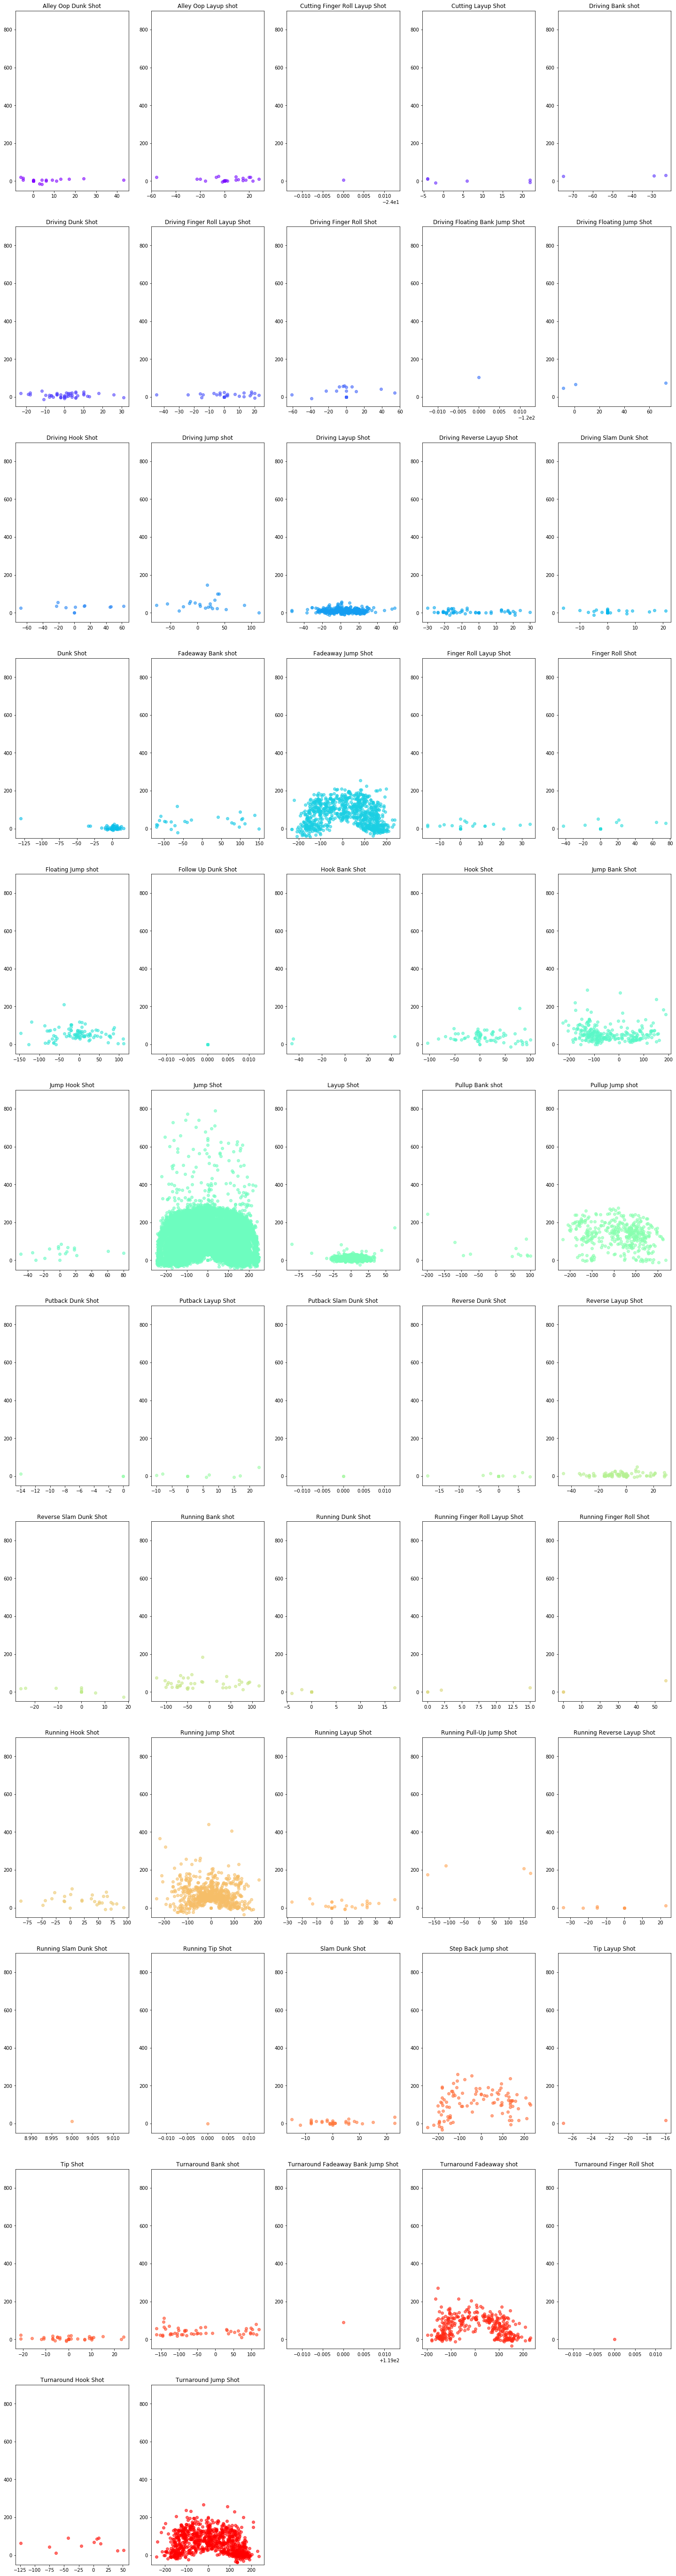

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
court_scale, alpha = 2.5, 0.6
plt.figure(figsize=(court_scale*10, court_scale*40))
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(train_data.action_type))))
for i,c in zip(range(0,len(np.unique(train_data.action_type))), colors):
    plt.subplot(12,5,i+1)
    h = train_data.loc[train_data.action_type == np.unique(train_data.action_type)[i]]
    plt.scatter(h.loc_x,h.loc_y, color=c, alpha=alpha)
    plt.title(str(np.unique(train_data.action_type)[i]))
    ax = plt.gca()
    ax.set_ylim([-50, 900])
    

In [114]:
train_data['dist'] = np.sqrt(train_data['loc_x']**2 + train_data['loc_y']**2)
loc_x_zero = train_data['loc_x'] == 0
loc_x_neg = train_data['loc_x'] < 0
train_data['angle'] = np.zeros(len(train_data))
train_data.loc[~(loc_x_zero&loc_x_neg),'angle'] = np.arctan(train_data.loc[~(loc_x_zero&loc_x_neg),'loc_y'] / train_data.loc[~(loc_x_zero&loc_x_neg),'loc_x'])
train_data.loc[loc_x_zero,'angle'] = np.pi/2
train_data.loc[loc_x_neg,'angle'] = np.arctan(train_data.loc[loc_x_neg,'loc_y'] / train_data.loc[loc_x_neg,'loc_x'])+np.pi

In [115]:
test_data['dist'] = np.sqrt(test_data['loc_x']**2 + test_data['loc_y']**2)
loc_x_zero = test_data['loc_x'] == 0
loc_x_neg = test_data['loc_x'] < 0
test_data['angle'] = np.zeros(len(test_data))
test_data.loc[~(loc_x_zero&loc_x_neg),'angle'] = np.arctan(test_data.loc[~(loc_x_zero&loc_x_neg),'loc_y'] / test_data.loc[~(loc_x_zero&loc_x_neg),'loc_x'])
test_data.loc[loc_x_zero,'angle'] = np.pi/2
test_data.loc[loc_x_neg,'angle'] = np.arctan(test_data.loc[loc_x_neg,'loc_y'] / test_data.loc[loc_x_neg,'loc_x'])+np.pi

In [52]:
#print((np.arctan(-np.sqrt(3)/1))*180/np.pi)

In [53]:
train_data['angle'].describe()

count    24557.000000
mean         1.503756
std          0.844647
min         -1.446441
25%          0.894256
50%          1.570796
75%          2.121779
max          4.612720
Name: angle, dtype: float64

In [54]:
test_data['angle'].describe()

count    6140.000000
mean        1.513257
std         0.852878
min        -1.446441
25%         0.904350
50%         1.570796
75%         2.148838
max         4.582686
Name: angle, dtype: float64

D:\Users\VincentWu\Anaconda3\envs\dl\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


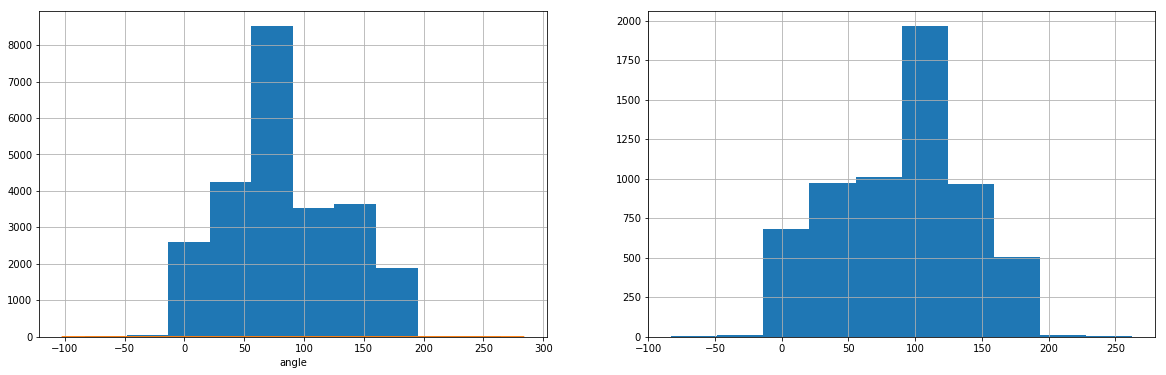

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,6))
plt.subplot(121)
A=train_data['angle']*180/np.pi
A.hist()
sns.distplot(A)
plt.subplot(122)
B=test_data['angle']*180/np.pi
B.hist()
plt.show()

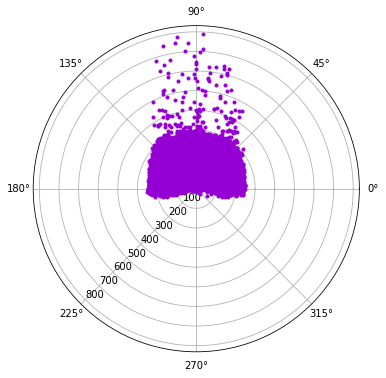

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,6))
ax = plt.subplot(polar=True)
ax.plot(train_data['angle'],train_data['dist'],'.',color='darkviolet')
ax.set_rlabel_position(225)
plt.show()

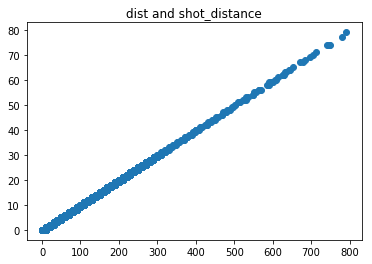

In [110]:
plt.scatter(train_data.dist, train_data.shot_distance)
plt.title('dist and shot_distance')
plt.show()

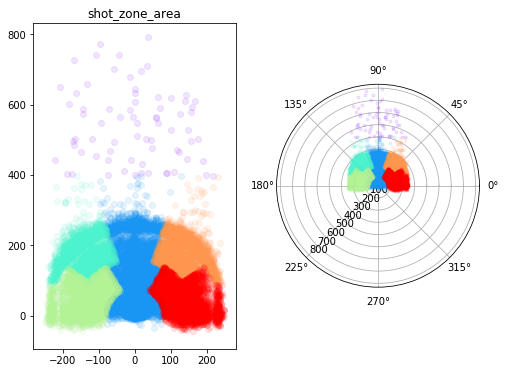

In [111]:
import matplotlib.cm as cm
def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = train_data.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 1, len(gs)))
    for g, c in zip(gs, cs):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, alpha=alpha)
def polar_plot_by_category(feat):
    alpha = 0.1
    gs = train_data.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 1, len(gs)))
    for g, c in zip(gs, cs):
        ax.plot(g[1].angle,g[1].dist,'.',color=c, alpha=alpha)
        ax.set_rlabel_position(225)

plt.figure(figsize=(8, 6))
# shot_zone_area
plt.subplot(121,polar=False)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')

ax = plt.subplot(122,polar=True)
polar_plot_by_category('shot_zone_area')
plt.show()

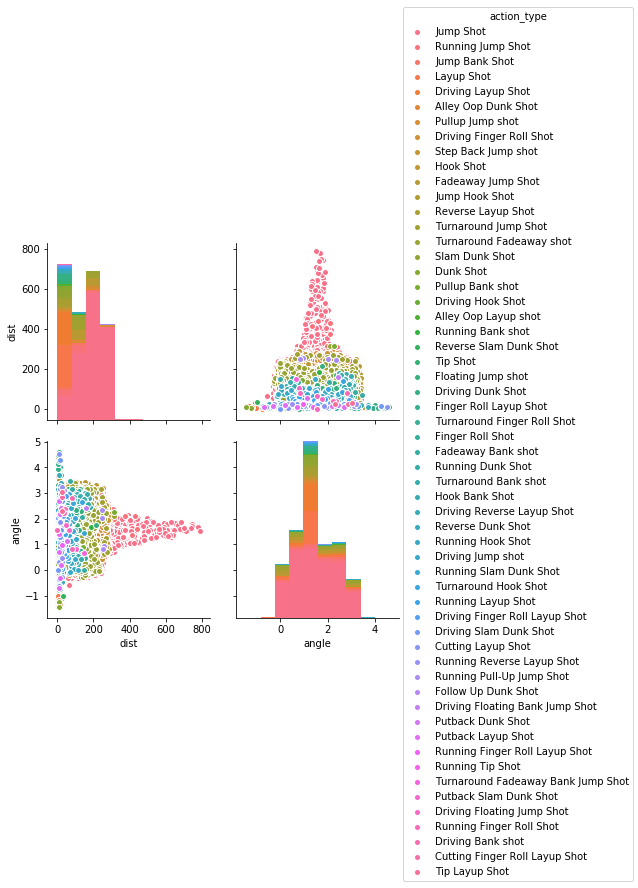

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(train_data, vars=['dist', 'angle'], hue='action_type', size=3)
plt.show()

In [116]:
train_data['shot_made_flag']=train_data['shot_made_flag'].fillna(2)
test_data['shot_made_flag']=test_data['shot_made_flag'].fillna(2)

In [117]:
drops=['shot_id', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining',
       'seconds_remaining', 'shot_distance', #'shot_made_flag',
       'shot_zone_area', 'game_date']
for drop in drops:
    train_data = train_data.drop(drop, 1)

In [118]:
drops=['lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining',
       'seconds_remaining', 'shot_distance', #'shot_made_flag',
       'shot_zone_area', 'game_date']
for drop in drops:
    test_data = test_data.drop(drop, 1)

In [119]:
categorial_cols = [
    'period', 'season','game_year', 'game_month', 'opponent', 'shot_made_flag']
#categorial_cols = [
#    'period', 'season', 'game_month','opponent']
for cc in categorial_cols:
    dummies = pd.get_dummies(train_data[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    train_data.drop(cc, axis=1, inplace=True)
    train_data = train_data.join(dummies)

In [120]:
categorial_cols = [
    'period', 'season','game_year', 'game_month', 'opponent', 'shot_made_flag']
#categorial_cols = [
#    'period', 'season', 'game_month','opponent']
for cc in categorial_cols:
    dummies = pd.get_dummies(test_data[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    test_data.drop(cc, axis=1, inplace=True)
    test_data = test_data.join(dummies)

In [121]:
train_data.columns

Index(['action_type', 'playoffs', 'remaining_time', 'dist', 'angle',
       'period#1', 'period#2', 'period#3', 'period#4', 'period#5', 'period#6',
       'period#7', 'season#0', 'season#1', 'season#2', 'season#3', 'season#4',
       'season#5', 'season#6', 'season#7', 'season#8', 'season#9', 'season#10',
       'season#11', 'season#13', 'season#14', 'season#15', 'season#16',
       'season#97', 'season#98', 'season#99', 'game_year#1996',
       'game_year#1997', 'game_year#1998', 'game_year#1999', 'game_year#2000',
       'game_year#2001', 'game_year#2002', 'game_year#2003', 'game_year#2004',
       'game_year#2005', 'game_year#2006', 'game_year#2007', 'game_year#2008',
       'game_year#2009', 'game_year#2010', 'game_year#2011', 'game_year#2012',
       'game_year#2013', 'game_year#2014', 'game_year#2015', 'game_year#2016',
       'game_month#1', 'game_month#2', 'game_month#3', 'game_month#4',
       'game_month#5', 'game_month#6', 'game_month#10', 'game_month#11',
       'game_month

In [122]:
train_X=train_data.drop('action_type',axis=1)
train_Y=train_data[['action_type']]
test_Idx=test_data[['shot_id']]
test_X=test_data.drop('shot_id',axis=1)

In [123]:
train_Y.head()

,action_type
0,Jump Shot
1,Jump Shot
2,Jump Shot
3,Running Jump Shot
4,Jump Shot


In [124]:
train_X,test_X = train_X.align(test_X, join='outer', axis=1, fill_value=0)

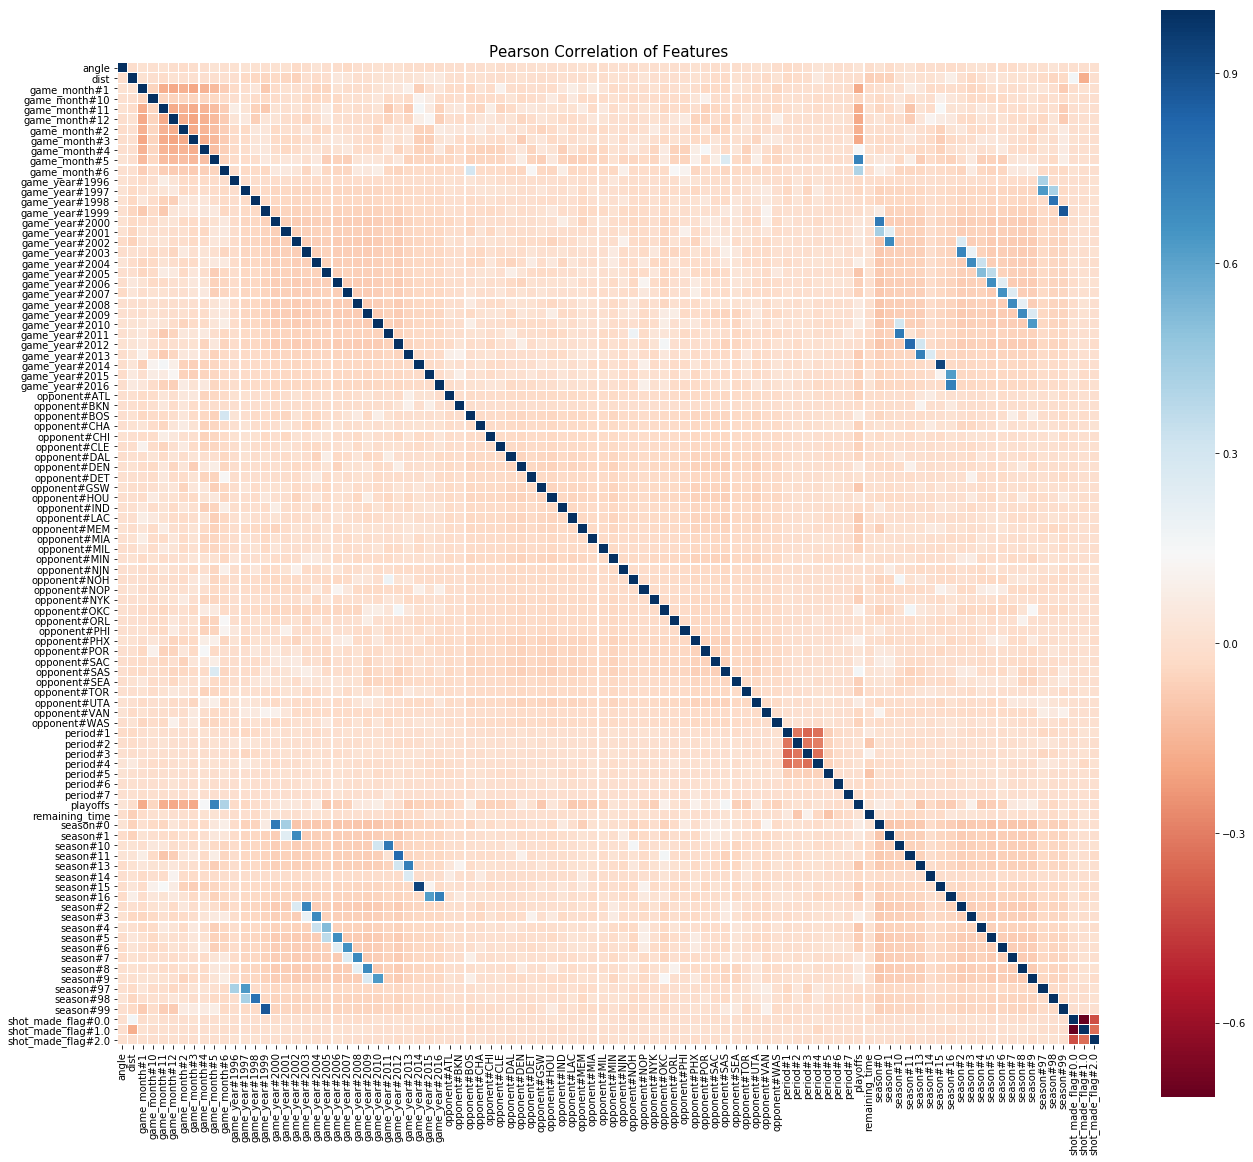

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
colormap = plt.cm.RdBu
plt.figure(figsize=(22,20))
plt.title('Pearson Correlation of Features', size=15)
sns.heatmap(train_X.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

In [126]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
components = 1

sc1=StandardScaler()
sc1.fit(train_X[['playoffs','game_month#5','game_month#6']])
pca1 = PCA(n_components=components)
pca1.fit(sc1.transform(train_X[['playoffs','game_month#5','game_month#6']]))
tr_PC1=pd.DataFrame(pca1.fit_transform(sc1.transform(train_X[['playoffs','game_month#5','game_month#6']])),columns=['PC1'])

sc2=StandardScaler()
sc2.fit(train_X[['season#0','game_year#2000','game_year#2001']])
pca2 = PCA(n_components=components)
pca2.fit(sc2.transform(train_X[['season#0','game_year#2000','game_year#2001']]))
tr_PC2=pd.DataFrame(pca2.fit_transform(sc2.transform(train_X[['season#0','game_year#2000','game_year#2001']])),columns=['PC2'])

sc3=StandardScaler()
sc3.fit(train_X[['season#1','game_year#2002']])
pca3 = PCA(n_components=components)
pca3.fit(sc3.transform(train_X[['season#1','game_year#2002']]))
tr_PC3=pd.DataFrame(pca3.fit_transform(sc3.transform(train_X[['season#1','game_year#2002']])),columns=['PC3'])

sc4=StandardScaler()
sc4.fit(train_X[['season#2','game_year#2003']])
pca4 = PCA(n_components=components)
pca4.fit(sc4.transform(train_X[['season#2','game_year#2003']]))
tr_PC4=pd.DataFrame(pca4.fit_transform(sc4.transform(train_X[['season#2','game_year#2003']])),columns=['PC4'])

sc5=StandardScaler()
sc5.fit(train_X[['season#3','game_year#2004']])
pca5 = PCA(n_components=components)
pca5.fit(sc5.transform(train_X[['season#3','game_year#2004']]))
tr_PC5=pd.DataFrame(pca5.fit_transform(sc5.transform(train_X[['season#3','game_year#2004']])),columns=['PC5'])

sc6=StandardScaler()
sc6.fit(train_X[['season#4','game_year#2005']])
pca6 = PCA(n_components=components)
pca6.fit(sc6.transform(train_X[['season#4','game_year#2005']]))
tr_PC6=pd.DataFrame(pca6.fit_transform(sc6.transform(train_X[['season#4','game_year#2005']])),columns=['PC6'])

sc7=StandardScaler()
sc7.fit(train_X[['season#5','game_year#2006']])
pca7 = PCA(n_components=components)
pca7.fit(sc7.transform(train_X[['season#5','game_year#2006']]))
tr_PC7=pd.DataFrame(pca7.fit_transform(sc7.transform(train_X[['season#5','game_year#2006']])),columns=['PC7'])

sc8=StandardScaler()
sc8.fit(train_X[['season#6','game_year#2007']])
pca8 = PCA(n_components=components)
pca8.fit(sc8.transform(train_X[['season#6','game_year#2007']]))
tr_PC8=pd.DataFrame(pca8.fit_transform(sc8.transform(train_X[['season#6','game_year#2007']])),columns=['PC8'])

sc9=StandardScaler()
sc9.fit(train_X[['season#7','game_year#2008']])
pca9 = PCA(n_components=components)
pca9.fit(sc9.transform(train_X[['season#7','game_year#2008']]))
tr_PC9=pd.DataFrame(pca9.fit_transform(sc9.transform(train_X[['season#7','game_year#2008']])),columns=['PC9'])

sc10=StandardScaler()
sc10.fit(train_X[['season#8','game_year#2009']])
pca10 = PCA(n_components=components)
pca10.fit(sc10.transform(train_X[['season#8','game_year#2009']]))
tr_PC10=pd.DataFrame(pca10.fit_transform(sc10.transform(train_X[['season#8','game_year#2009']])),columns=['PC10'])

sc11=StandardScaler()
sc11.fit(train_X[['season#9','game_year#2010']])
pca11 = PCA(n_components=components)
pca11.fit(sc11.transform(train_X[['season#9','game_year#2010']]))
tr_PC11=pd.DataFrame(pca11.fit_transform(sc11.transform(train_X[['season#9','game_year#2010']])),columns=['PC11'])

sc12=StandardScaler()
sc12.fit(train_X[['season#10','game_year#2011']])
pca12 = PCA(n_components=components)
pca12.fit(sc12.transform(train_X[['season#10','game_year#2011']]))
tr_PC12=pd.DataFrame(pca12.fit_transform(sc12.transform(train_X[['season#10','game_year#2011']])),columns=['PC12'])

sc13=StandardScaler()
sc13.fit(train_X[['season#11','game_year#2012']])
pca13 = PCA(n_components=components)
pca13.fit(sc13.transform(train_X[['season#11','game_year#2012']]))
tr_PC13=pd.DataFrame(pca13.fit_transform(sc13.transform(train_X[['season#11','game_year#2012']])),columns=['PC13'])

sc14=StandardScaler()
sc14.fit(train_X[['season#13','game_year#2013']])
pca14 = PCA(n_components=components)
pca14.fit(sc14.transform(train_X[['season#13','game_year#2013']]))
tr_PC14=pd.DataFrame(pca14.fit_transform(sc14.transform(train_X[['season#13','game_year#2013']])),columns=['PC14'])

sc15=StandardScaler()
sc15.fit(train_X[['season#15','game_year#2014']])
pca15 = PCA(n_components=components)
pca15.fit(sc15.transform(train_X[['season#15','game_year#2014']]))
tr_PC15=pd.DataFrame(pca15.fit_transform(sc15.transform(train_X[['season#15','game_year#2014']])),columns=['PC15'])

sc16=StandardScaler()
sc16.fit(train_X[['season#16','game_year#2015','game_year#2016']])
pca16 = PCA(n_components=components)
pca16.fit(sc16.transform(train_X[['season#16','game_year#2015','game_year#2016']]))
tr_PC16=pd.DataFrame(pca16.fit_transform(sc16.transform(train_X[['season#16','game_year#2015','game_year#2016']])),columns=['PC16'])

sc17=StandardScaler()
sc17.fit(train_X[['season#97','game_year#1997']])
pca17 = PCA(n_components=components)
pca17.fit(sc17.transform(train_X[['season#97','game_year#1997']]))
tr_PC17=pd.DataFrame(pca17.fit_transform(sc17.transform(train_X[['season#97','game_year#1997']])),columns=['PC17'])

sc18=StandardScaler()
sc18.fit(train_X[['season#98','game_year#1998']])
pca18 = PCA(n_components=components)
pca18.fit(sc18.transform(train_X[['season#98','game_year#1998']]))
tr_PC18=pd.DataFrame(pca18.fit_transform(sc18.transform(train_X[['season#98','game_year#1998']])),columns=['PC18'])

sc19=StandardScaler()
sc19.fit(train_X[['season#99','game_year#1999']])
pca19 = PCA(n_components=components)
pca19.fit(sc19.transform(train_X[['season#99','game_year#1999']]))
tr_PC19=pd.DataFrame(pca19.fit_transform(sc19.transform(train_X[['season#99','game_year#1999']])),columns=['PC19'])

In [127]:
components = 1

sc1=StandardScaler()
sc1.fit(test_X[['playoffs','game_month#5','game_month#6']])
pca1 = PCA(n_components=components)
pca1.fit(sc1.transform(test_X[['playoffs','game_month#5','game_month#6']]))
te_PC1=pd.DataFrame(pca1.fit_transform(sc1.transform(test_X[['playoffs','game_month#5','game_month#6']])),columns=['PC1'])

sc2=StandardScaler()
sc2.fit(test_X[['season#0','game_year#2000','game_year#2001']])
pca2 = PCA(n_components=components)
pca2.fit(sc2.transform(test_X[['season#0','game_year#2000','game_year#2001']]))
te_PC2=pd.DataFrame(pca2.fit_transform(sc2.transform(test_X[['season#0','game_year#2000','game_year#2001']])),columns=['PC2'])

sc3=StandardScaler()
sc3.fit(test_X[['season#1','game_year#2002']])
pca3 = PCA(n_components=components)
pca3.fit(sc3.transform(test_X[['season#1','game_year#2002']]))
te_PC3=pd.DataFrame(pca3.fit_transform(sc3.transform(test_X[['season#1','game_year#2002']])),columns=['PC3'])

sc4=StandardScaler()
sc4.fit(test_X[['season#2','game_year#2003']])
pca4 = PCA(n_components=components)
pca4.fit(sc4.transform(test_X[['season#2','game_year#2003']]))
te_PC4=pd.DataFrame(pca4.fit_transform(sc4.transform(test_X[['season#2','game_year#2003']])),columns=['PC4'])

sc5=StandardScaler()
sc5.fit(test_X[['season#3','game_year#2004']])
pca5 = PCA(n_components=components)
pca5.fit(sc5.transform(test_X[['season#3','game_year#2004']]))
te_PC5=pd.DataFrame(pca5.fit_transform(sc5.transform(test_X[['season#3','game_year#2004']])),columns=['PC5'])

sc6=StandardScaler()
sc6.fit(test_X[['season#4','game_year#2005']])
pca6 = PCA(n_components=components)
pca6.fit(sc6.transform(test_X[['season#4','game_year#2005']]))
te_PC6=pd.DataFrame(pca6.fit_transform(sc6.transform(test_X[['season#4','game_year#2005']])),columns=['PC6'])

sc7=StandardScaler()
sc7.fit(test_X[['season#5','game_year#2006']])
pca7 = PCA(n_components=components)
pca7.fit(sc7.transform(test_X[['season#5','game_year#2006']]))
te_PC7=pd.DataFrame(pca7.fit_transform(sc7.transform(test_X[['season#5','game_year#2006']])),columns=['PC7'])

sc8=StandardScaler()
sc8.fit(test_X[['season#6','game_year#2007']])
pca8 = PCA(n_components=components)
pca8.fit(sc8.transform(test_X[['season#6','game_year#2007']]))
te_PC8=pd.DataFrame(pca8.fit_transform(sc8.transform(test_X[['season#6','game_year#2007']])),columns=['PC8'])

sc9=StandardScaler()
sc9.fit(test_X[['season#7','game_year#2008']])
pca9 = PCA(n_components=components)
pca9.fit(sc9.transform(test_X[['season#7','game_year#2008']]))
te_PC9=pd.DataFrame(pca9.fit_transform(sc9.transform(test_X[['season#7','game_year#2008']])),columns=['PC9'])

sc10=StandardScaler()
sc10.fit(test_X[['season#8','game_year#2009']])
pca10 = PCA(n_components=components)
pca10.fit(sc10.transform(test_X[['season#8','game_year#2009']]))
te_PC10=pd.DataFrame(pca10.fit_transform(sc10.transform(test_X[['season#8','game_year#2009']])),columns=['PC10'])

sc11=StandardScaler()
sc11.fit(test_X[['season#9','game_year#2010']])
pca11 = PCA(n_components=components)
pca11.fit(sc11.transform(test_X[['season#9','game_year#2010']]))
te_PC11=pd.DataFrame(pca11.fit_transform(sc11.transform(test_X[['season#9','game_year#2010']])),columns=['PC11'])

sc12=StandardScaler()
sc12.fit(test_X[['season#10','game_year#2011']])
pca12 = PCA(n_components=components)
pca12.fit(sc12.transform(test_X[['season#10','game_year#2011']]))
te_PC12=pd.DataFrame(pca12.fit_transform(sc12.transform(test_X[['season#10','game_year#2011']])),columns=['PC12'])

sc13=StandardScaler()
sc13.fit(test_X[['season#11','game_year#2012']])
pca13 = PCA(n_components=components)
pca13.fit(sc13.transform(test_X[['season#11','game_year#2012']]))
te_PC13=pd.DataFrame(pca13.fit_transform(sc13.transform(test_X[['season#11','game_year#2012']])),columns=['PC13'])

sc14=StandardScaler()
sc14.fit(test_X[['season#13','game_year#2013']])
pca14 = PCA(n_components=components)
pca14.fit(sc14.transform(test_X[['season#13','game_year#2013']]))
te_PC14=pd.DataFrame(pca14.fit_transform(sc14.transform(test_X[['season#13','game_year#2013']])),columns=['PC14'])

sc15=StandardScaler()
sc15.fit(test_X[['season#15','game_year#2014']])
pca15 = PCA(n_components=components)
pca15.fit(sc15.transform(test_X[['season#15','game_year#2014']]))
te_PC15=pd.DataFrame(pca15.fit_transform(sc15.transform(test_X[['season#15','game_year#2014']])),columns=['PC15'])

sc16=StandardScaler()
sc16.fit(test_X[['season#16','game_year#2015','game_year#2016']])
pca16 = PCA(n_components=components)
pca16.fit(sc16.transform(test_X[['season#16','game_year#2015','game_year#2016']]))
te_PC16=pd.DataFrame(pca16.fit_transform(sc16.transform(test_X[['season#16','game_year#2015','game_year#2016']])),columns=['PC16'])

sc17=StandardScaler()
sc17.fit(test_X[['season#97','game_year#1997']])
pca17 = PCA(n_components=components)
pca17.fit(sc17.transform(test_X[['season#97','game_year#1997']]))
te_PC17=pd.DataFrame(pca17.fit_transform(sc17.transform(test_X[['season#97','game_year#1997']])),columns=['PC17'])

sc18=StandardScaler()
sc18.fit(test_X[['season#98','game_year#1998']])
pca18 = PCA(n_components=components)
pca18.fit(sc18.transform(test_X[['season#98','game_year#1998']]))
te_PC18=pd.DataFrame(pca18.fit_transform(sc18.transform(test_X[['season#98','game_year#1998']])),columns=['PC18'])

sc19=StandardScaler()
sc19.fit(test_X[['season#99','game_year#1999']])
pca19 = PCA(n_components=components)
pca19.fit(sc19.transform(test_X[['season#99','game_year#1999']]))
te_PC19=pd.DataFrame(pca19.fit_transform(sc19.transform(test_X[['season#99','game_year#1999']])),columns=['PC19'])

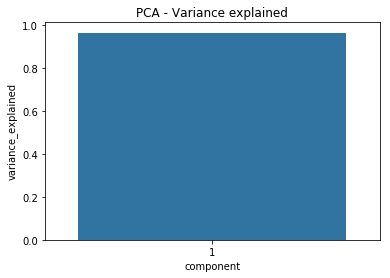

In [128]:
#Show explained variance for each component
pca_variance_explained_df = pd.DataFrame({
    "component": np.arange(1, components+1),
    "variance_explained": pca15.explained_variance_ratio_            
    })

ax = sns.barplot(x='component', y='variance_explained', data=pca_variance_explained_df)
ax.set_title("PCA - Variance explained")
plt.show()

In [129]:
features_to_drop=['playoffs','game_month#5','game_month#6',
                 'season#97', 'season#98','season#99',
                 'season#0', 'season#1','season#2', 'season#3','season#4', 'season#5', 'season#6','season#7', 
                 'season#8', 'season#9', 'season#10','season#11', 'season#13','season#15', 'season#16', 
                 'game_year#1997', 'game_year#1998', 'game_year#1999', 
                 'game_year#2000','game_year#2001', 'game_year#2002', 'game_year#2003', 'game_year#2004',
                 'game_year#2005', 'game_year#2006', 'game_year#2007', 'game_year#2008', 'game_year#2009',
                 'game_year#2010', 'game_year#2011', 'game_year#2012','game_year#2013', 'game_year#2014', 
                 'game_year#2015', 'game_year#2016']
train_X = train_X.drop(features_to_drop,axis=1)

In [130]:
test_X = test_X.drop(features_to_drop,axis=1)

In [131]:
train_X=train_X.join([tr_PC1,tr_PC2,tr_PC3,tr_PC4,tr_PC5,tr_PC6,tr_PC7,tr_PC8,tr_PC9,tr_PC10,
                      tr_PC11,tr_PC12,tr_PC13,tr_PC14,tr_PC15,tr_PC16,tr_PC17,tr_PC18,tr_PC19])
train_X.columns

Index(['angle', 'dist', 'game_month#1', 'game_month#10', 'game_month#11',
       'game_month#12', 'game_month#2', 'game_month#3', 'game_month#4',
       'game_year#1996', 'opponent#ATL', 'opponent#BKN', 'opponent#BOS',
       'opponent#CHA', 'opponent#CHI', 'opponent#CLE', 'opponent#DAL',
       'opponent#DEN', 'opponent#DET', 'opponent#GSW', 'opponent#HOU',
       'opponent#IND', 'opponent#LAC', 'opponent#MEM', 'opponent#MIA',
       'opponent#MIL', 'opponent#MIN', 'opponent#NJN', 'opponent#NOH',
       'opponent#NOP', 'opponent#NYK', 'opponent#OKC', 'opponent#ORL',
       'opponent#PHI', 'opponent#PHX', 'opponent#POR', 'opponent#SAC',
       'opponent#SAS', 'opponent#SEA', 'opponent#TOR', 'opponent#UTA',
       'opponent#VAN', 'opponent#WAS', 'period#1', 'period#2', 'period#3',
       'period#4', 'period#5', 'period#6', 'period#7', 'remaining_time',
       'season#14', 'shot_made_flag#0.0', 'shot_made_flag#1.0',
       'shot_made_flag#2.0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', '

In [132]:
test_X=test_X.join([te_PC1,te_PC2,te_PC3,te_PC4,te_PC5,te_PC6,te_PC7,te_PC8,te_PC9,te_PC10,te_PC11,
                    te_PC12,te_PC13,te_PC14,te_PC15,te_PC16,te_PC17,te_PC18,te_PC19])
test_X.columns

Index(['angle', 'dist', 'game_month#1', 'game_month#10', 'game_month#11',
       'game_month#12', 'game_month#2', 'game_month#3', 'game_month#4',
       'game_year#1996', 'opponent#ATL', 'opponent#BKN', 'opponent#BOS',
       'opponent#CHA', 'opponent#CHI', 'opponent#CLE', 'opponent#DAL',
       'opponent#DEN', 'opponent#DET', 'opponent#GSW', 'opponent#HOU',
       'opponent#IND', 'opponent#LAC', 'opponent#MEM', 'opponent#MIA',
       'opponent#MIL', 'opponent#MIN', 'opponent#NJN', 'opponent#NOH',
       'opponent#NOP', 'opponent#NYK', 'opponent#OKC', 'opponent#ORL',
       'opponent#PHI', 'opponent#PHX', 'opponent#POR', 'opponent#SAC',
       'opponent#SAS', 'opponent#SEA', 'opponent#TOR', 'opponent#UTA',
       'opponent#VAN', 'opponent#WAS', 'period#1', 'period#2', 'period#3',
       'period#4', 'period#5', 'period#6', 'period#7', 'remaining_time',
       'season#14', 'shot_made_flag#0.0', 'shot_made_flag#1.0',
       'shot_made_flag#2.0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', '

In [133]:
print(train_X.shape)
print(test_X.shape)

(24557, 74)
(6140, 74)


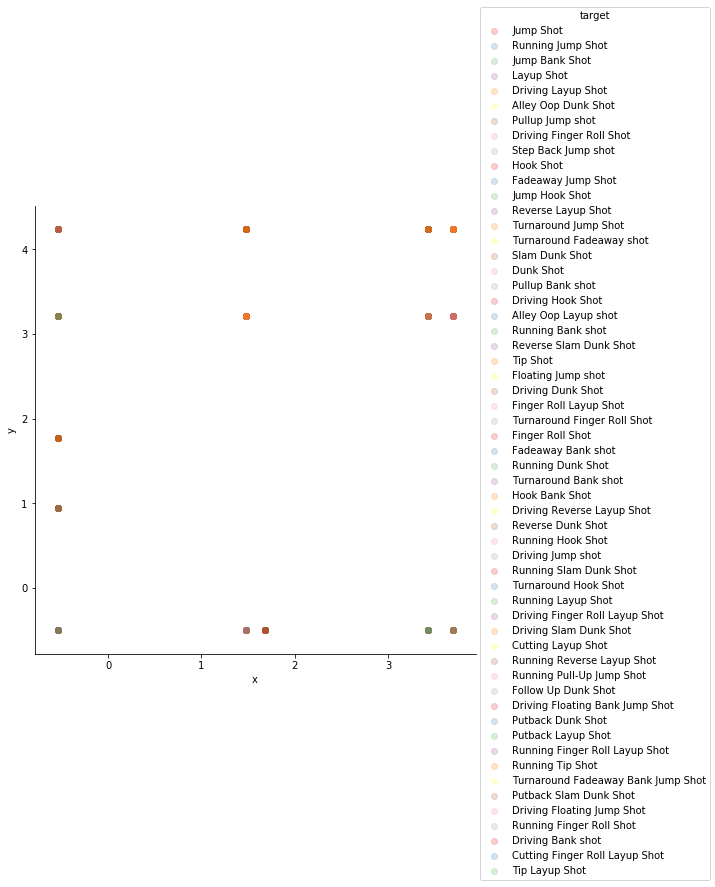

In [83]:
#X_pca = pd.DataFrame(pca.transform(sc.transform(train_X))[:,0:2])
X_pca=PC1.copy()
X_pca['y']=PC2.copy()
X_pca['target'] = train_Y.values
X_pca.columns = ["x", "y", "target"]
sns.lmplot('x','y', 
           data=X_pca, 
           hue="target", 
           fit_reg=False, 
           palette="Set1",
           size=7,
           scatter_kws={"alpha": .2}
          )
plt.show()

In [85]:
train_X_PCA=pd.DataFrame(pca.fit_transform(sc.transform(train_X)))
test_X_PCA=pd.DataFrame(pca.fit_transform(sc.transform(test_X)))

In [34]:
'''
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_X,train_Y,test_size=0.20,random_state=1)
'''

In [35]:
'''
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
threshold = 0.90
vt = VarianceThreshold().fit(X_train)
# Find feature names
feat_var_threshold = train_X.columns[vt.variances_ > threshold * (1-threshold)]
feat_var_threshold
'''

Index(['angle', 'dist', 'game_month#1', 'game_month#11', 'game_month#12',
       'game_month#2', 'game_month#3', 'game_month#4', 'period#1', 'period#2',
       'period#3', 'period#4', 'playoffs', 'remaining_time', 'season#0'],
      dtype='object')

In [38]:
'''
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train['action_type'])
feature_imp = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["importance"])
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
feat_imp_20
'''

Index(['dist', 'remaining_time', 'angle', 'period#3', 'period#1', 'period#4',
       'period#2', 'game_month#3', 'game_month#1', 'game_month#2',
       'game_month#4', 'game_month#12', 'opponent#DEN', 'game_month#11',
       'opponent#HOU', 'opponent#SAS', 'opponent#PHX', 'opponent#GSW',
       'opponent#POR', 'opponent#SAC'],
      dtype='object')

In [39]:
'''
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler(feature_range=(0,1)).fit_transform(X_train)
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, y_train['action_type'])
feature_scoring = pd.DataFrame({
        'feature': X_train.columns,
        'score': X_scored.scores_
    })

feat_scored_20 = feature_scoring.sort_values('score', ascending=False).head(20)['feature'].values
feat_scored_20
'''

array(['dist', 'season#16', 'game_year#2016', 'season#0', 'season#13',
       'game_year#2013', 'season#98', 'game_year#2000', 'game_year#2015',
       'opponent#OKC', 'game_year#2012', 'opponent#TOR', 'game_year#2004',
       'game_year#1998', 'season#11', 'game_year#1999', 'season#10',
       'season#9', 'game_year#2014', 'season#15'], dtype=object)

In [40]:
'''
from sklearn.linear_model import LogisticRegression
rfe = RFE(LogisticRegression(), 20)
rfe.fit(X_train, y_train['action_type'])

feature_rfe_scoring = pd.DataFrame({
        'feature': X_train.columns,
        'score': rfe.ranking_
    })

feat_rfe_20 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_20
'''

array(['angle', 'game_year#1999', 'game_year#2013', 'period#1', 'period#2',
       'period#3', 'period#4', 'season#0', 'season#1', 'season#10',
       'season#15', 'season#16', 'season#2', 'season#3', 'season#4',
       'season#5', 'season#6', 'season#8', 'season#97', 'season#98'], dtype=object)

In [41]:
'''
features = np.hstack([
        feat_var_threshold, 
        feat_imp_20,
        feat_scored_20,
        feat_rfe_20
    ])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))
'''

Final features set:

	-angle
	-dist
	-game_month#1
	-game_month#11
	-game_month#12
	-game_month#2
	-game_month#3
	-game_month#4
	-game_year#1998
	-game_year#1999
	-game_year#2000
	-game_year#2004
	-game_year#2012
	-game_year#2013
	-game_year#2014
	-game_year#2015
	-game_year#2016
	-opponent#DEN
	-opponent#GSW
	-opponent#HOU
	-opponent#OKC
	-opponent#PHX
	-opponent#POR
	-opponent#SAC
	-opponent#SAS
	-opponent#TOR
	-period#1
	-period#2
	-period#3
	-period#4
	-playoffs
	-remaining_time
	-season#0
	-season#1
	-season#10
	-season#11
	-season#13
	-season#15
	-season#16
	-season#2
	-season#3
	-season#4
	-season#5
	-season#6
	-season#8
	-season#9
	-season#97
	-season#98


In [48]:
'''
features.shape
'''

(48,)

In [49]:
'''
train_X = train_X.loc[:, features]
test_X = test_X.loc[:, features]
'''

In [134]:
train_X.to_pickle('train_X_pd.pkl')
train_Y.to_pickle('train_Y_pd.pkl')
#train_X_PCA.to_pickle('train_X_PCA_pd.pkl')
test_Idx.to_pickle('test_Idx_pd.pkl')
test_X.to_pickle('test_X_pd.pkl')
#test_X_PCA.to_pickle('test_X_PCA_pd.pkl')

In [169]:
train_X=pd.read_pickle('train_X_pd.pkl')
#train_X_PCA=pd.read_pickle('train_X_PCA_pd.pkl')
train_Y=pd.read_pickle('train_Y_pd.pkl')
test_Idx=pd.read_pickle('test_Idx_pd.pkl')
test_X=pd.read_pickle('test_X_pd.pkl')
#test_X_PCA=pd.read_pickle('test_X_PCA_pd.pkl')

In [170]:
print(train_X.shape)
#print(train_X_PCA.shape)
print(train_Y.shape)
print(test_Idx.shape)
print(test_X.shape)
#print(train_X_PCA.shape)

(24557, 71)
(24557, 1)
(6140, 1)
(6140, 71)


In [41]:

list(set(train_X.columns)-set(test_X.columns))

[]